# Analyzing Used Car Posts in Craigslist 

In [243]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt

In [245]:
#load data file
myfile='/Users/xiangs/github/cardeal/CAR_PRICE_DATA_1.csv'
df = pd.read_csv(myfile) #, low_memory=False
rows, cols = df.shape
print rows, 'x', cols

25216 x 14


In [246]:
print df.columns

Index([u'PID', u'POSTTIME', u'CITY', u'STATE', u'MAKE', u'MODEL', u'PRICE',
       u'YEAR', u'MILES', u'URL', u'TITLE', u'ATTR', u'IMGLINK', u'MESSAGE'],
      dtype='object')


# 1. Post traffic week

In [247]:
from datetime import datetime
weekday = []
for i in range(rows):
    mydate = df.ix[i,'POSTTIME']
    #print mydate
    md = datetime.strptime( mydate,'%Y-%m-%d %H:%M' ) 
    
    #datetime.datetime.strptime(mydate, '%Y-%m-%d').date()
    
    weekday.append(md.isoweekday())  #Monday 1 ... Sunday 7


In [17]:
weekday[:20]

[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [248]:
outfile = open('weekday.txt', 'w')
for i in weekday:
    outfile.write("%d\n" % i)

count = [0,0,0,0,0,0,0] #1-7 Mon-Sun
for i in range(rows):
    count[weekday[i]-1] += 1

for n in range(7):
    count[n] = float(count[n])/rows
    print count[n]

0.148239213198
0.117663388325
0.116394352792
0.14066465736
0.169654187817
0.174730329949
0.132653870558


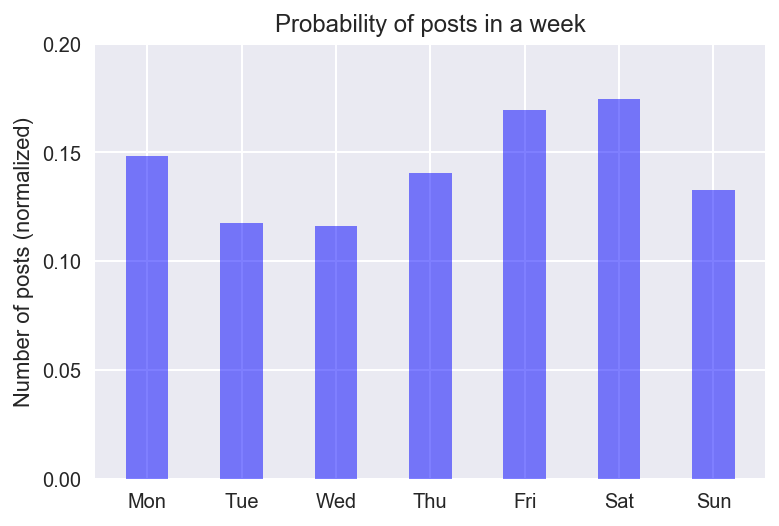

In [249]:
plt.figure(1)
width = 0.45
wdt = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ind = range(1,8)
p1 = plt.bar(ind, count, width, color='b',alpha=0.5)
plt.ylabel('Number of posts (normalized)')
plt.title('Probability of posts in a week')
plt.xticks(ind, ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
plt.yticks(np.arange(0, 0.21, 0.05))
#plt.savefig('Posts_week.eps', format='eps', dpi=600)

plt.savefig("Posts_week.png", dpi=256)
plt.show()

# 2. Post traffic day

In [250]:
hour = []
for i in range(rows):
    mytime = df.ix[i, 'POSTTIME']
    #print mytime
    mt = datetime.strptime( mytime,'%Y-%m-%d %H:%M' ) 
    #datetime.datetime.strptime(mytime, '%H:%M').time()
    hour.append(mt.time().hour)

a = map(float, np.zeros(24)) 
for i in range(rows):
    a[hour[i]] += 1.0

for n in range(24):
    a[n] /= rows
    #print a[n]

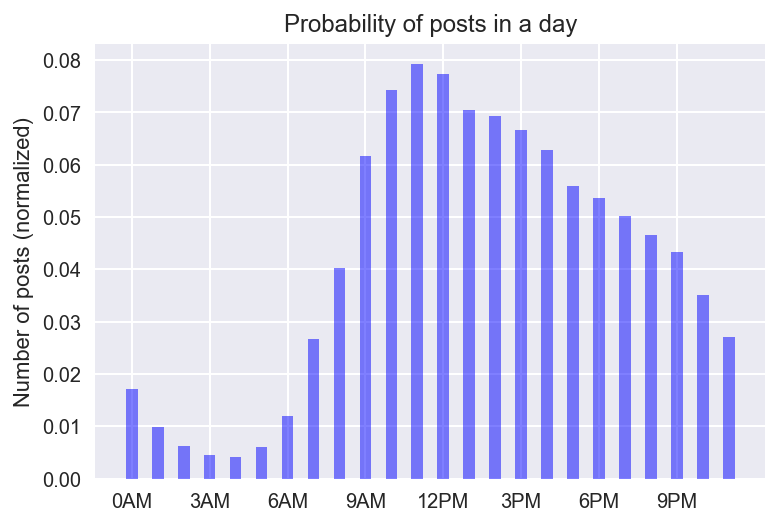

In [251]:
plt.figure(2)
width = 0.45
ind = range(0,24)
p1 = plt.bar(ind, a, width, color='b',alpha=0.5)
plt.ylabel('Number of posts (normalized)')
plt.title('Probability of posts in a day')
plt.xticks(np.arange(0, 24, 3), ('0AM', '3AM','6AM', '9AM', '12PM', '3PM', '6PM', '9PM'))
#plt.yticks(np.arange(0, 0.21, 0.05))
#plt.savefig('Posts_week.eps', format='eps', dpi=600)
plt.savefig("Posts_day.png", dpi=256)
plt.show()

# 3. Average price week

5194.51471375
5223.94405123
5337.19216354
5480.91795884
5503.96774194
5385.07852928
5078.06307922


<IPython.core.display.Javascript object>


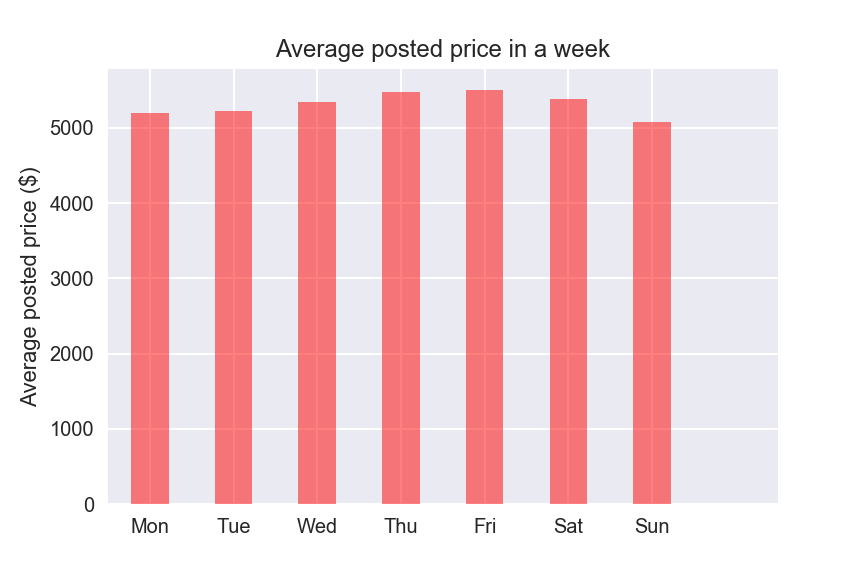

In [255]:
accum = np.zeros(7) #1-7 Mon-Sun
count = np.zeros(7)
for i in range(rows):
    mydate = df.ix[i, 'POSTTIME']
    #print mydate
    md = datetime.strptime( mydate,'%Y-%m-%d %H:%M' )  
    #datetime.datetime.strptime(mydate, '%Y-%m-%d').date()
    accum[md.weekday()] += df.ix[i,'PRICE']
    count[md.weekday()] += 1

for n in range(7):
    accum[n] /= count[n]
    print accum[n]

plt.figure(3)
width = 0.45
wdt = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ind = range(7)
p1 = plt.bar(ind, accum, width, color='r', alpha=0.5)
plt.ylabel('Average posted price ($)')
plt.title('Average posted price in a week')
plt.xticks(ind, ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
#plt.yticks(np.arange(0, 0.21, 0.05))
#plt.savefig('Posts_week.eps', format='eps', dpi=600)

plt.xlim([-0.5, 7.5])
plt.show()

plt.savefig("Price_avg_week.png")

# 4. Average price day

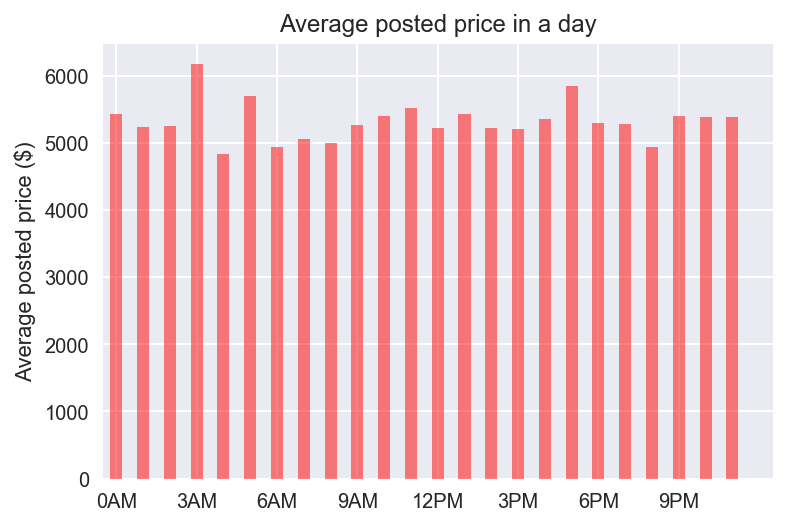

In [253]:
accum = np.zeros(24) #0-23 hours
count = np.zeros(24)
for i in range(rows):
    mytime = df.ix[i, 'POSTTIME']
    #print mydate
    mt = datetime.strptime( mytime, '%Y-%m-%d %H:%M' ) 
    accum[mt.hour] += df.ix[i, 'PRICE']
    count[mt.hour] += 1

for n in range(24):
    accum[n] /= count[n]
    #print accum[n]

plt.figure(4)
width = 0.45
ind = range(0,24)
p1 = plt.bar(ind, accum, width, color='r', alpha=0.5)
plt.ylabel('Average posted price ($)')
plt.title('Average posted price in a day')
plt.xticks(np.arange(0, 24, 3), ('0AM', '3AM','6AM', '9AM', '12PM', '3PM', '6PM', '9PM'))
plt.xlim([-0.5, 24.5])
#plt.yticks(np.arange(0, 0.21, 0.05))
#plt.savefig('Posts_week.eps', format='eps', dpi=600)
plt.savefig("Price_avg_day.png")
plt.show()

# 5. Price distribution

In [129]:
#load data file
myfile='/Users/xiangs/github/cardeal/CAR_PRICE_DATA_1.csv'
df = pd.read_csv(myfile) #, low_memory=False
rows, cols = df.shape
print rows, 'x', cols


#e.g. toyota camry

df1 = df[df.MODEL == 'camry']
mean = df1.ix[:,'PRICE'].mean()
max = df1.ix[:,'PRICE'].max()
min = df1.ix[:,'PRICE'].min()

price = df1.ix[:,'PRICE'].values
mile = df1.ix[:,'MILES'].values
year = df1.ix[:,'YEAR'].values

23301 x 14


<IPython.core.display.Javascript object>


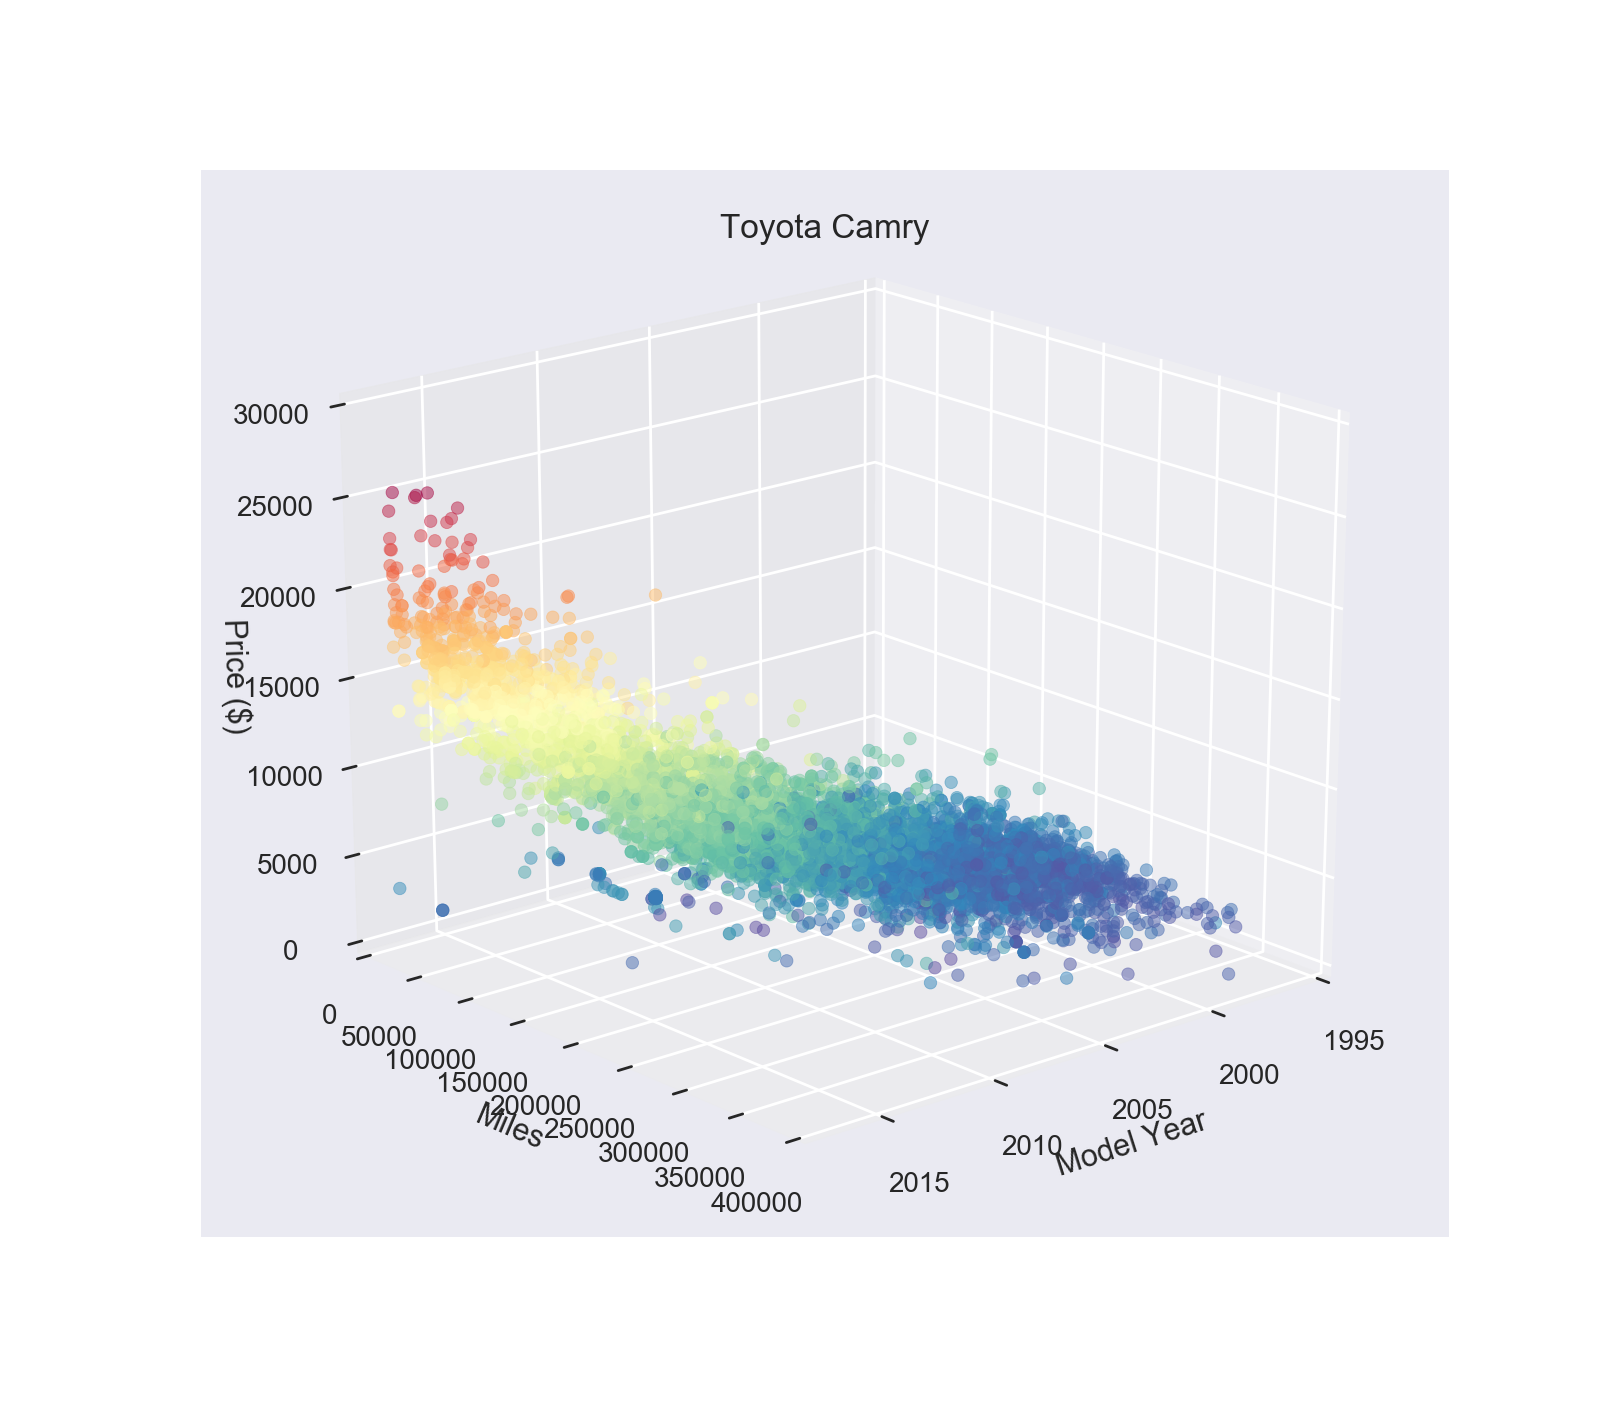

In [242]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import math
C = []
sty = []
for p in price:
    if p > mean :
        C.append('r')
        sty.append('o')
    else :
        C.append('b')
        sty.append('^')

x = year.tolist()
y = mile.tolist()
y = map(int, mile.tolist())
z = price.tolist()

colorm = z #map(math.log, price) 

fig = plt.figure(figsize=(5, 5),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c = colorm, marker='o',alpha=0.5, cmap='Spectral_r') #cmap='viridis_r'
#http://matplotlib.org/examples/color/colormaps_reference.html

#for i in range(price.size):
#    ax.scatter(year[i],mile[i],price[i],c='b')
ax.set_title('Toyota Camry')
ax.set_xlabel('Model Year')
ax.set_ylabel('Miles')
ax.set_zlabel('Price ($)')
ax.set_xlim3d(1995, 2018)
ax.set_ylim3d(0, 400000)
ax.set_zlim3d(0, 30000)
plt.show()

In [42]:
from bokeh.plotting import figure, output_file, output_notebook, show

In [43]:
output_notebook()

Loading BokehJS ...

In [229]:
price = df1.ix[:,'PRICE'].values
mile = df1.ix[:,'MILES'].values
year = df1.ix[:,'YEAR'].values

x = year
y = mile/1000.0
z = price

radii = z/40000.0
colors = [
    "#%02x%02x%02x" % (int(r), 0, 200) for r in radii*500
    #(int(r), int(g), 150) for r, g in zip(50+5*(x-1995), 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(title="Toyota Camry Price ($)", plot_width=600, plot_height=600, tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.4,
          line_color=None)

#output_file("color_scatter.html", title="color_scatter.py example")
p.xaxis[0].axis_label = 'Year'
p.yaxis[0].axis_label = 'Mileage (k)'

show(p)  # open a browser


In [135]:
for i in range(len(price)): 
    p = price[i]
    m = mile[i]
    y = year[i]
    if m > 400000: #p < 1000 and y > 2015:
        print i, p, m, y

In [159]:
len(price)

8586

In [161]:
df1['MILES'][:5]

0    159000
1    158900
2     32788
3    200080
4     89500
Name: MILES, dtype: int64

# 6. Machine learning of price

In [162]:
from sklearn import base

In [ ]:
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
        data = []
        for row in X:
            new_row = []
            for col in self.col_names:
                new_row.append(row[col])
            data.append(new_row)
        return data

           

In [189]:
y_price = df1['PRICE'].values
print y_price[:10]
type(y_price)
y_input = np.array(y_price).reshape(-1,1)
print y_input.shape
print y_input[:5]

[ 3150  4900 16800  2200  8800  2050  4651  6400  5250 16288]
(8586, 1)
[[ 3150]
 [ 4900]
 [16800]
 [ 2200]
 [ 8800]]


In [190]:
X_df1 = df1[['YEAR', 'MILES']]

In [191]:
X_df1.head()

,YEAR,MILES
0,2001,159000
1,2006,158900
2,2014,32788
3,2001,200080
4,2009,89500


In [192]:
X_input = X_df1.values

In [193]:
X_input[:5]
type(X_input[0][0])
print X_input.shape

(8586, 2)


## 6.1 Linear regression

In [186]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge
LR = linear_model.LinearRegression()
RG = Ridge(alpha=0.5)


In [194]:
LR.fit(X_input, y_input)
RG.fit(X_input, y_input)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [195]:
price_predLR = LR.predict(X_input)
price_predRG = RG.predict(X_input)

In [196]:
price = df1.ix[:,'PRICE'].values
mile = df1.ix[:,'MILES'].values
year = df1.ix[:,'YEAR'].values

<IPython.core.display.Javascript object>


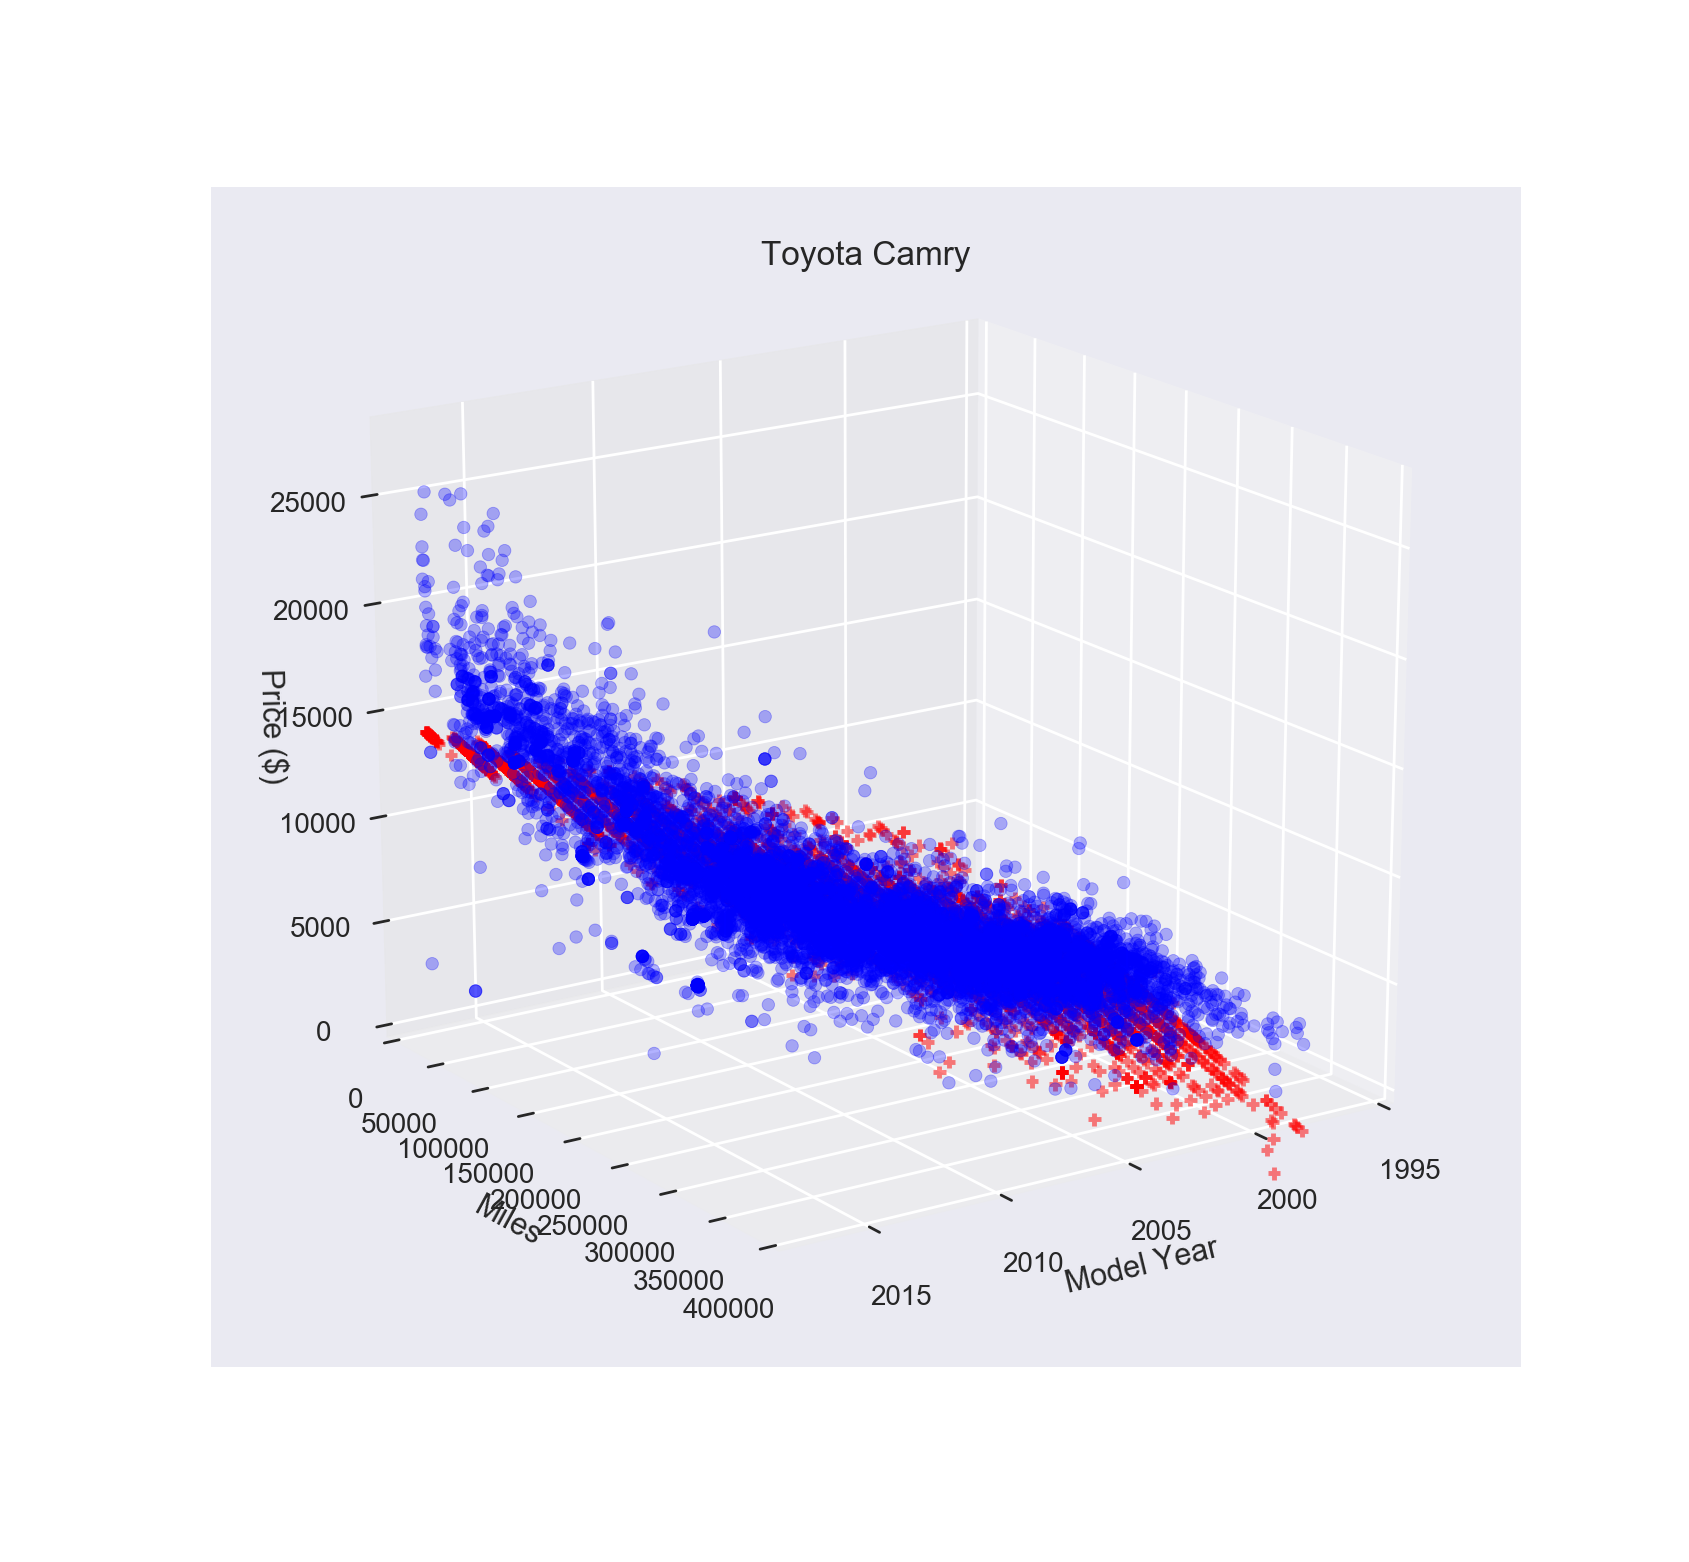

In [240]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

x = map(int,year.tolist())
y = map(int, mile.tolist())
z = price.tolist()

#colorm = z #map(math.log, price) 

fig = plt.figure(figsize=(5, 5),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c = 'b', marker='o',alpha=0.3)
ax.scatter(x,y,price_predLR, c = 'r', marker='+',alpha=0.5)
#ax.scatter(x,y,price_predRG, c = 'g', marker='^',alpha=0.5)

#for i in range(price.size):
#    ax.scatter(year[i],mile[i],price[i],c='b')
ax.set_title('Toyota Camry')
ax.set_xlabel('Model Year')
ax.set_ylabel('Miles')
ax.set_zlabel('Price ($)')
ax.set_xlim3d(1995, 2018)
ax.set_ylim3d(0, 400000)
ax.set_zlim3d(0, 28000)
plt.show()

## 6.2 Non-Linear regression: ensemble method

In [200]:
import numpy as np
from sklearn import datasets, linear_model, utils, preprocessing
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn import neighbors
from sklearn import ensemble
from sklearn.pipeline import Pipeline, FeatureUnion


class EnsembleTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, base_estimator, residual_estimators):
        self.base_estimator = base_estimator
        self.residual_estimators = residual_estimators
    
    def fit(self, X, y):
        self.base_estimator.fit(X, y)
        y_err = y - self.base_estimator.predict(X)
        for est in self.residual_estimators:
            est.fit(X, y_err)
        return self
    
    def transform(self, X):
        all_ests = [self.base_estimator] + list(self.residual_estimators)
        return np.array([est.predict(X) for est in all_ests]).T


ensemble_pipe = Pipeline([ 
        ('ensemble', EnsembleTransformer(
                linear_model.LinearRegression(),
                (neighbors.KNeighborsRegressor(n_neighbors=10),
                 ensemble.RandomForestRegressor(min_samples_leaf=5)))),
        ('blend', linear_model.LinearRegression())
    ])


In [205]:
ensemble_pipe.fit(X_input, y_input.reshape(-1))

Pipeline(steps=[('ensemble', EnsembleTransformer(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
          residual_estimators=(KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
   ...=False)))), ('blend', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [206]:
price_predENS = ensemble_pipe.predict(X_input)

<IPython.core.display.Javascript object>


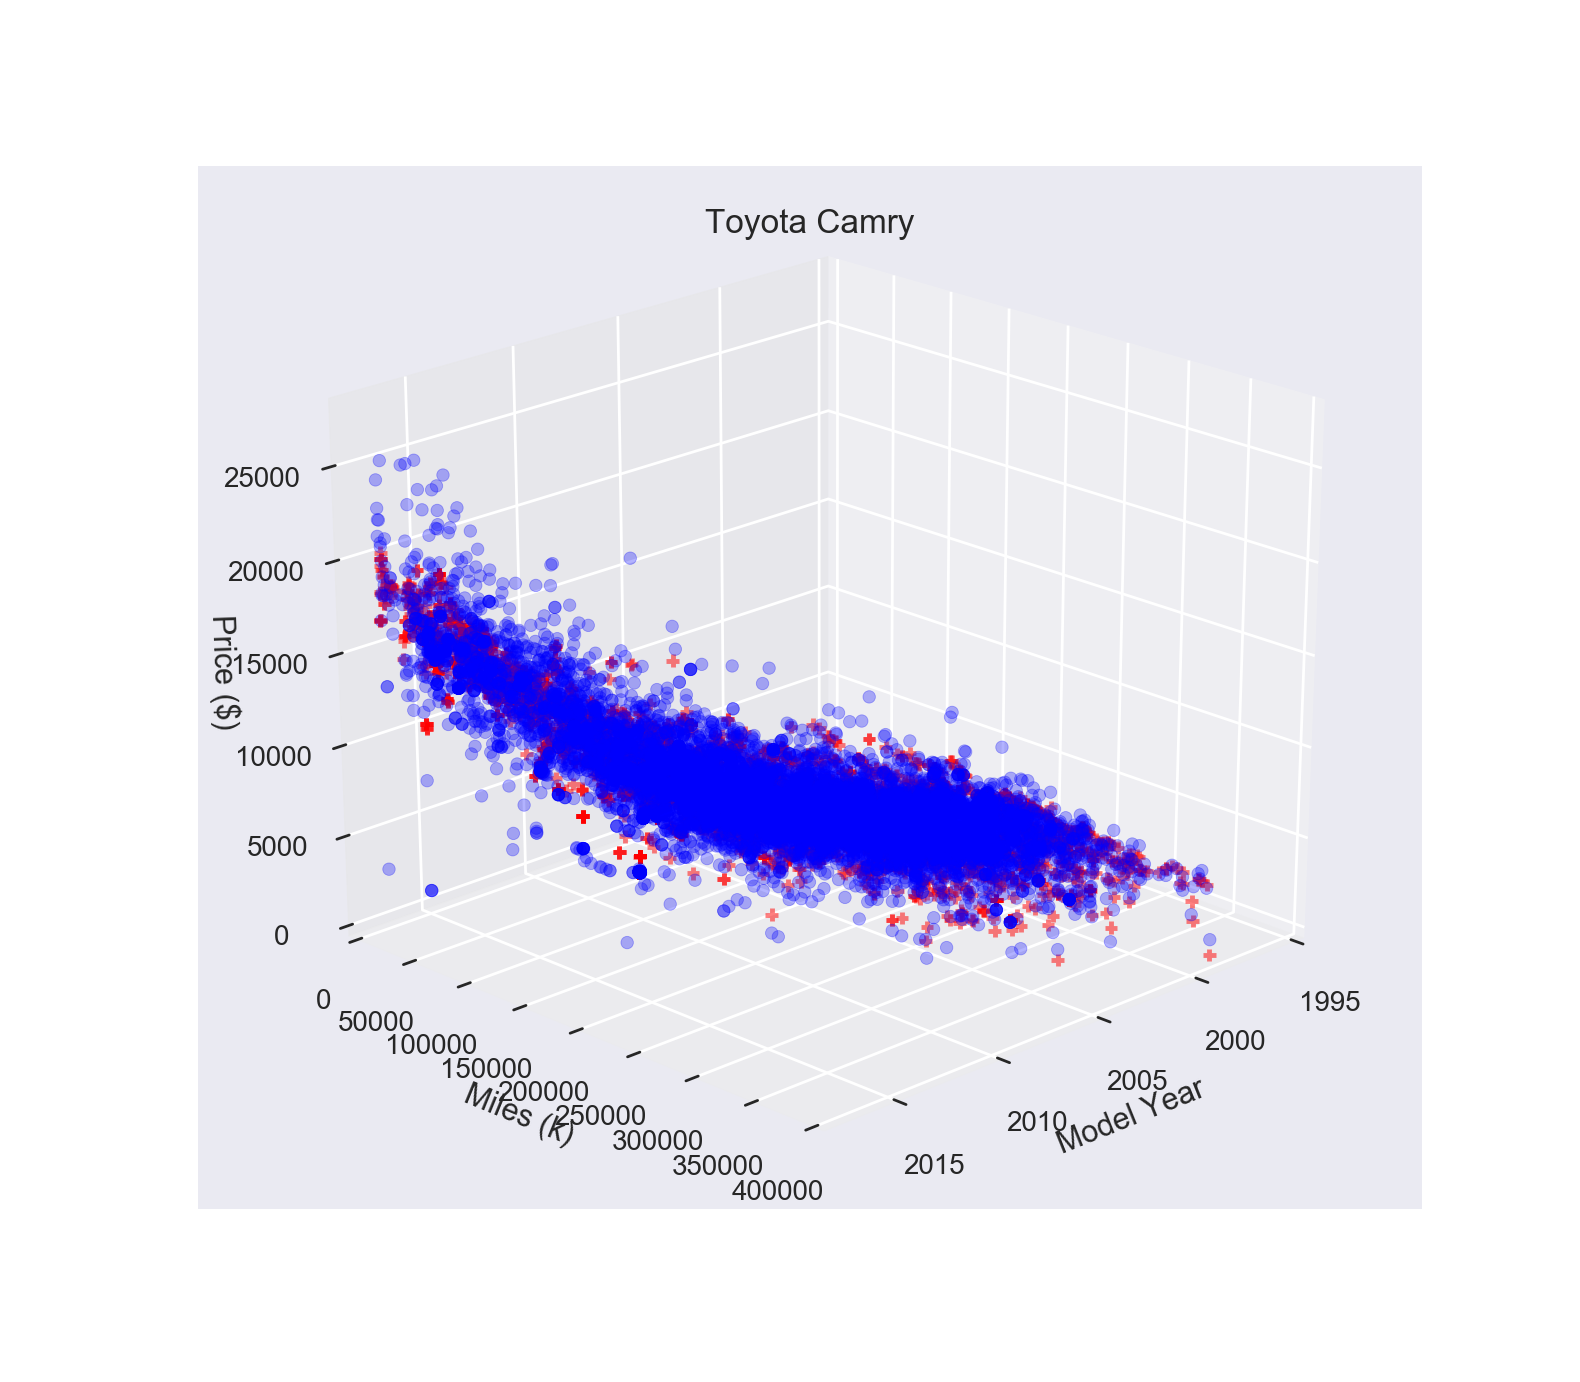

In [254]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

x = year.tolist()
y = map(int, mile.tolist())
z = price.tolist()

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c = 'b', marker='o',alpha=0.3)
ax.scatter(x,y,price_predENS, c = 'r', marker='+',alpha=0.5)
#ax.scatter(x,y,price_predRG, c = 'g', marker='^',alpha=0.5)

ax.set_title('Toyota Camry')
ax.set_xlabel('Model Year')
ax.set_ylabel('Miles (k)')
ax.set_zlabel('Price ($)')
ax.set_xlim3d(1995, 2018)
ax.set_ylim3d(0, 400000)
ax.set_zlim3d(0, 28000)
plt.show()

## Add categorical features by DictFlattener and DictVectorizer

In [330]:
mytest = [{
  'postday': 180,
  'city': 'sfbay',
  'state': 'CA',
  'make': 'toyota',
  'model': 'camry',
  'year' : 2014,
  'miles' : 50300,
  'attr': {'title status': 'clean', 'cylinder': '4 cylinders', 'paint color': 'white'}
  },  
  {
  'postday': 182,
  'city': 'chicago',
  'state': 'IL',
  'make': 'toyota',
  'model': 'camry',
  'year' : 2012,
  'miles' : 70569,
  'attr': {'title status': 'clean', 'cylinder': '6 cylinders', 'transmission': 'automatic'}
  }
]

print mytest

def Dict_Flattener_transform(X):
    # X will come in as a list of dicts. Return a list of dicts.
    l = []
    for x in X:
        dic = dict()
        for a in x: 
            #x: dict like {key1:value1, key2: {kkey3: value3, kkey4: value4}}
            #a: entry like key1:value1 or key2: {kkey3: value3, kkey4: value4}
            #dic[a] = 1
            value1 = x[a]
            #print type(value1)
            
            if isinstance(value1, bool):
                    if value1 == True:
                        dic[a] = int(1)
                    else:
                        dic[a] = int(0)
                    continue
                    
            if isinstance(value1, dict): 
                for b in value1:
                    value2 = value1[b]
                    #print type(value2)
                    if isinstance(value2, bool):
                        if value2 == True:
                            dic[a+'_'+b] = int(1)
                        else:
                            dic[a+'_'+b] = int(0)
                        continue
                    
                    if isinstance(value2, dict): 
                        print 'Error: more than 2 layers of dict !'
                    else:
                        if isinstance(value2, str): #type(value2)==type(''):
                            dic[a+'_'+b+'_'+value2] = 1
                        if isinstance(value2, (int, float)):
                            dic[a+'_'+b] = value2
                            
            else:
                if isinstance(value1, str): #(value1)==type(''):
                    dic[a+'_'+value1] = 1
                if isinstance(value1, (int, float)):
                    dic[a] = value1
        l.append(dic)
    return l

D = Dict_Flattener_transform(mytest)
print D

[{'city': 'sfbay', 'state': 'CA', 'miles': 50300, 'attr': {'title status': 'clean', 'cylinder': '4 cylinders', 'paint color': 'white'}, 'year': 2014, 'make': 'toyota', 'model': 'camry', 'postday': 180}, {'city': 'chicago', 'state': 'IL', 'miles': 70569, 'attr': {'title status': 'clean', 'transmission': 'automatic', 'cylinder': '6 cylinders'}, 'year': 2012, 'make': 'toyota', 'model': 'camry', 'postday': 182}]
[{'model_camry': 1, 'make_toyota': 1, 'attr_paint color_white': 1, 'attr_cylinder_4 cylinders': 1, 'year': 2014, 'attr_title status_clean': 1, 'state_CA': 1, 'postday': 180, 'miles': 50300, 'city_sfbay': 1}, {'attr_transmission_automatic': 1, 'make_toyota': 1, 'attr_cylinder_6 cylinders': 1, 'model_camry': 1, 'attr_title status_clean': 1, 'postday': 182, 'state_IL': 1, 'miles': 70569, 'year': 2012, 'city_chicago': 1}]


In [273]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
#D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = dv.fit_transform(D)
print X
back = dv.inverse_transform(X)
print back

[[  1.00000000e+00   0.00000000e+00   1.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   1.00000000e+00   1.00000000e+00
    5.03000000e+04   1.00000000e+00   1.80000000e+02   1.00000000e+00
    0.00000000e+00   2.01400000e+03]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   0.00000000e+00   1.00000000e+00
    7.05690000e+04   1.00000000e+00   1.82000000e+02   0.00000000e+00
    1.00000000e+00   2.01200000e+03]]
[{'model_camry': 1.0, 'make_toyota': 1.0, 'attr_paint color_white': 1.0, 'attr_cylinder_4 cylinders': 1.0, 'year': 2014.0, 'attr_title status_clean': 1.0, 'state_CA': 1.0, 'postday': 180.0, 'miles': 50300.0, 'city_sfbay': 1.0}, {'attr_transmission_automatic': 1.0, 'make_toyota': 1.0, 'attr_cylinder_6 cylinders': 1.0, 'model_camry': 1.0, 'attr_title status_clean': 1.0, 'postday': 182.0, 'state_IL': 1.0, 'miles': 70569.0, 'year': 2012.0, 'city_chicago': 1.0}]


In [262]:
posttime = df1.POSTTIME[0]

In [267]:
md = datetime.strptime( posttime,'%Y-%m-%d %H:%M' ) 
print md
md.timetuple().tm_yday

2017-06-29 20:28:00


180

In [304]:
#for colname in df1:
#    print colname
    
#for index, row in df1.head().iterrows():
#    print index, row
#print df1.ix[0]
rows_df , cols_df = df.shape
print rows_df , cols_df
print df1.columns

25216 14
Index([u'PID', u'POSTTIME', u'CITY', u'STATE', u'MAKE', u'MODEL', u'PRICE',
       u'YEAR', u'MILES', u'URL', u'TITLE', u'ATTR', u'IMGLINK', u'MESSAGE'],
      dtype='object')


In [303]:
l = []
rows_df , cols_df = df1.shape

rows_df = 2 # testing 

import re

def get_attr_dict(attr_str, title_str, message_str):
    dic = dict()
    text = title_str + '\n'+ message_str
    
    m = re.search(r'cylinders: (\d{1,2}) cylinders[#|$]' , attr_str)
    if m :  dic['CYLINDERS'] = m.group(1)
        
    m = re.search(r'fuel: (\w+)[#|$]' , attr_str)
    if m :  dic['FUEL'] = m.group(1)
        
    m = re.search(r'paint color: (\w+)[#|$]' , attr_str)
    if m :  dic['COLOR'] = m.group(1)
        
    m = re.search(r'condition: (\w+)[#|$]' , attr_str)
    if m :  dic['CONDITION'] = m.group(1)
        
    m = re.search(r'title status: (\w+)[#|$]' , attr_str)
    if m :  dic['TITLE STATUS'] = m.group(1)
        
    m = re.search(r'transmission: (\w+)[#|$]' , attr_str)
    if m :  dic['TRANSMISSION'] = m.group(1)
        
    m = re.search(r'type: (\w+)[#|$]' , attr_str)
    if m :  dic['TYPE'] = m.group(1)
        
    m = re.search(r'size: (\w+)[#|$]' , attr_str)
    if m :  dic['SIZE'] = m.group(1)
        
    m = re.search(r'drive: (\w+)[#|$]' , attr_str)
    if m :  dic['DRIVE'] = m.group(1)
        
    return dic
    
#test inner loop for df_Dict_Transform
for i in range(rows_df):
    row = df1.ix[i]
    dic = dict()
    md = datetime.strptime( posttime,'%Y-%m-%d %H:%M' ) 
    dic['POSTDAY'] = md.timetuple().tm_yday
    dic['CITY'] = row['CITY']
    dic['STATE'] = row['STATE']
    dic['MAKE'] = row['MAKE']
    dic['MODEL'] = row['MODEL']
    dic['YEAR'] = int(row['YEAR'])
    dic['MILES'] = int(row['MILES'])
    dic['ATTR'] = get_attr_dict(row['ATTR'],row['TITLE'],row['MESSAGE'])
    print dic
    l.append(dic)
    


{'CITY': 'sfbay', 'ATTR': {'FUEL': 'gas', 'TITLE STATUS': 'clean', 'CYLINDERS': '4'}, 'MAKE': 'toyota', 'POSTDAY': 180, 'STATE': 'CA', 'MILES': 159000, 'YEAR': 2001, 'MODEL': 'camry'}
{'CITY': 'sfbay', 'ATTR': {'CYLINDERS': '4', 'TITLE STATUS': 'clean', 'COLOR': 'black', 'DRIVE': 'fwd', 'TRANSMISSION': 'automatic', 'FUEL': 'gas', 'CONDITION': 'excellent'}, 'MAKE': 'toyota', 'POSTDAY': 180, 'STATE': 'CA', 'MILES': 158900, 'YEAR': 2006, 'MODEL': 'camry'}


In [308]:
def df_Dict_Transform(df1):
    l = []
    rows_df , cols_df = df1.shape
    for i in range(rows_df):
        row = df1.ix[i]
        dic = dict()
        md = datetime.strptime( posttime,'%Y-%m-%d %H:%M' ) 
        dic['POSTDAY'] = md.timetuple().tm_yday
        dic['CITY'] = row['CITY']
        dic['STATE'] = row['STATE']
        dic['MAKE'] = row['MAKE']
        dic['MODEL'] = row['MODEL']
        dic['YEAR'] = int(row['YEAR'])
        dic['MILES'] = int(row['MILES'])
        dic['ATTR'] = get_attr_dict(row['ATTR'],row['TITLE'],row['MESSAGE'])
        #print dic
        l.append(dic)    
    return l

df_Dict_Transform(df1.head(2))

[{'ATTR': {'CYLINDERS': '4', 'FUEL': 'gas', 'TITLE STATUS': 'clean'},
  'CITY': 'sfbay',
  'MAKE': 'toyota',
  'MILES': 159000,
  'MODEL': 'camry',
  'POSTDAY': 180,
  'STATE': 'CA',
  'YEAR': 2001},
 {'ATTR': {'COLOR': 'black',
   'CONDITION': 'excellent',
   'CYLINDERS': '4',
   'DRIVE': 'fwd',
   'FUEL': 'gas',
   'TITLE STATUS': 'clean',
   'TRANSMISSION': 'automatic'},
  'CITY': 'sfbay',
  'MAKE': 'toyota',
  'MILES': 158900,
  'MODEL': 'camry',
  'POSTDAY': 180,
  'STATE': 'CA',
  'YEAR': 2006}]

In [311]:
X_dict = df_Dict_Transform(df1)

In [322]:
print len(X_dict)
X_dict[:2]

8586


[{'ATTR': {'CYLINDERS': '4', 'FUEL': 'gas', 'TITLE STATUS': 'clean'},
  'CITY': 'sfbay',
  'MAKE': 'toyota',
  'MILES': 159000,
  'MODEL': 'camry',
  'POSTDAY': 180,
  'STATE': 'CA',
  'YEAR': 2001},
 {'ATTR': {'COLOR': 'black',
   'CONDITION': 'excellent',
   'CYLINDERS': '4',
   'DRIVE': 'fwd',
   'FUEL': 'gas',
   'TITLE STATUS': 'clean',
   'TRANSMISSION': 'automatic'},
  'CITY': 'sfbay',
  'MAKE': 'toyota',
  'MILES': 158900,
  'MODEL': 'camry',
  'POSTDAY': 180,
  'STATE': 'CA',
  'YEAR': 2006}]

In [314]:
X_flatdict = Dict_Flattener(X_dict)

In [317]:
X_flatdict[:2]

[{'ATTR_CYLINDERS_4': 1,
  'ATTR_FUEL_gas': 1,
  'ATTR_TITLE STATUS_clean': 1,
  'CITY_sfbay': 1,
  'MAKE_toyota': 1,
  'MILES': 159000,
  'MODEL_camry': 1,
  'POSTDAY': 180,
  'STATE_CA': 1,
  'YEAR': 2001},
 {'ATTR_COLOR_black': 1,
  'ATTR_CONDITION_excellent': 1,
  'ATTR_CYLINDERS_4': 1,
  'ATTR_DRIVE_fwd': 1,
  'ATTR_FUEL_gas': 1,
  'ATTR_TITLE STATUS_clean': 1,
  'ATTR_TRANSMISSION_automatic': 1,
  'CITY_sfbay': 1,
  'MAKE_toyota': 1,
  'MILES': 158900,
  'MODEL_camry': 1,
  'POSTDAY': 180,
  'STATE_CA': 1,
  'YEAR': 2006}]

In [320]:
class DictFlattener(base.BaseEstimator, base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        l = []
        for x in X:
            dic = dict()
            for a in x: 
                #x: dict like {key1:value1, key2: {kkey3: value3, kkey4: value4}}
                #a: entry like key1:value1 or key2: {kkey3: value3, kkey4: value4}
                #dic[a] = 1
                value1 = x[a]
                #print type(value1)

                if isinstance(value1, bool):
                        if value1 == True:
                            dic[a] = int(1)
                        else:
                            dic[a] = int(0)
                        continue

                if isinstance(value1, dict): 
                    for b in value1:
                        value2 = value1[b]
                        #print type(value2)
                        if isinstance(value2, bool):
                            if value2 == True:
                                dic[a+'_'+b] = int(1)
                            else:
                                dic[a+'_'+b] = int(0)
                            continue

                        if isinstance(value2, dict): 
                            print 'Error: more than 2 layers of dict !'
                        else:
                            if isinstance(value2, str): #type(value2)==type(''):
                                dic[a+'_'+b+'_'+value2] = 1
                            if isinstance(value2, (int, float)):
                                dic[a+'_'+b] = value2

                else:
                    if isinstance(value1, str): #(value1)==type(''):
                        dic[a+'_'+value1] = 1
                    if isinstance(value1, (int, float)):
                        dic[a] = value1
            l.append(dic)
        return l


In [321]:
import numpy as np
from sklearn import datasets, linear_model, utils, preprocessing
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn import neighbors
from sklearn import ensemble
from sklearn.pipeline import Pipeline, FeatureUnion


class EnsembleTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, base_estimator, residual_estimators):
        self.base_estimator = base_estimator
        self.residual_estimators = residual_estimators
    
    def fit(self, X, y):
        self.base_estimator.fit(X, y)
        y_err = y - self.base_estimator.predict(X)
        for est in self.residual_estimators:
            est.fit(X, y_err)
        return self
    
    def transform(self, X):
        all_ests = [self.base_estimator] + list(self.residual_estimators)
        return np.array([est.predict(X) for est in all_ests]).T


ensemble_pipeline = Pipeline([ 
        ('dictflat', DictFlattener() ),
        ('vector', DictVectorizer(sparse=False)),
        ('ensemble', EnsembleTransformer(
                linear_model.LinearRegression(),
                (neighbors.KNeighborsRegressor(n_neighbors=10),
                 ensemble.RandomForestRegressor(min_samples_leaf=5)))),
        ('blend', linear_model.LinearRegression())
       ])


In [326]:
X_dict = df_Dict_Transform(df1)
y = df1['PRICE'].values
#y = y.reshape(-1)

In [327]:
ensemble_pipeline.fit(X_dict, y)

Pipeline(steps=[('dictflat', DictFlattener()), ('vector', DictVectorizer(dtype=<type 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('ensemble', EnsembleTransformer(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
          residual_estimators=...=False)))), ('blend', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [328]:
y_pred_new = ensemble_pipeline.predict(X_dict)

<IPython.core.display.Javascript object>


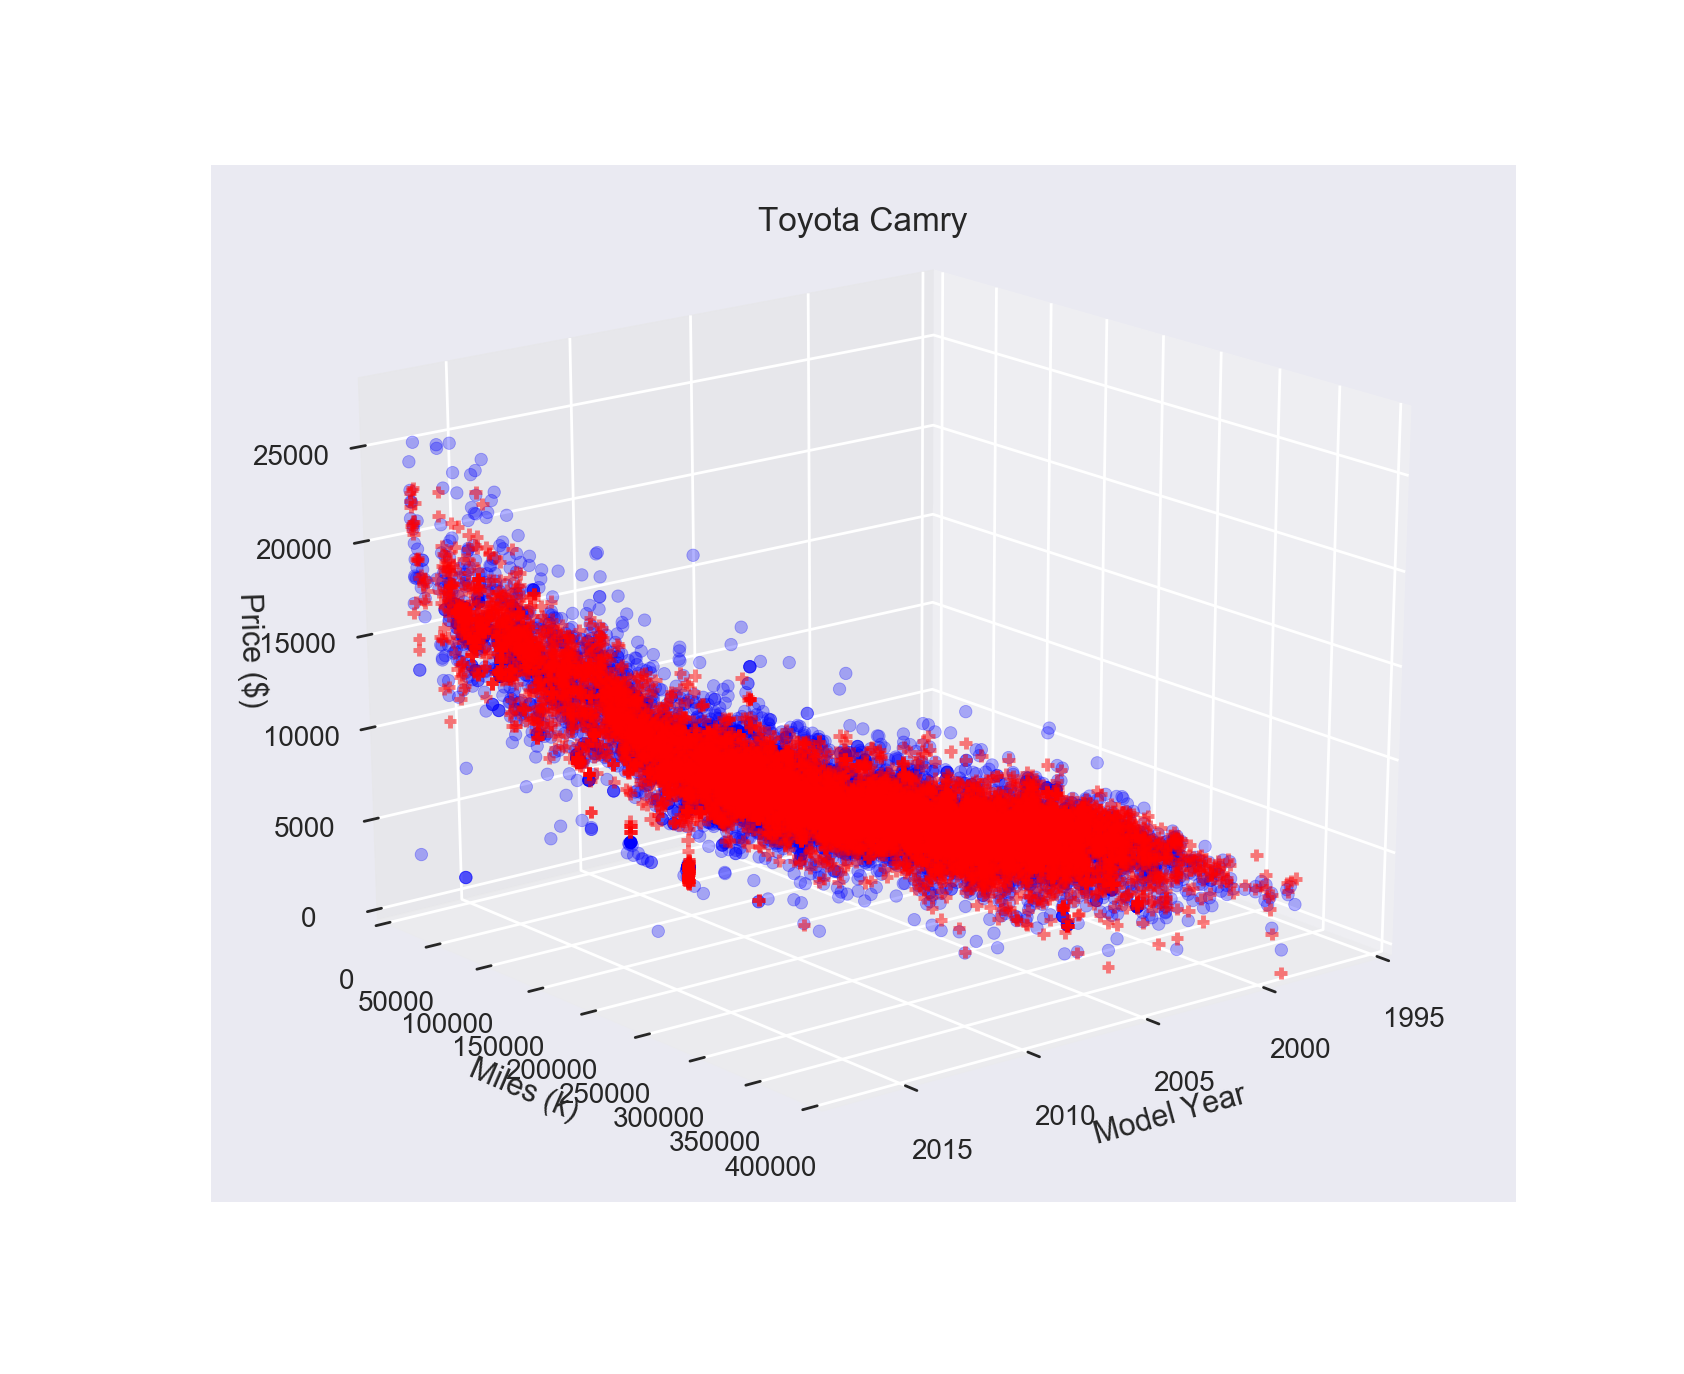

In [329]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

yr = year.tolist()
mi = map(int, mile.tolist())
pr = price.tolist()

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(yr, mi, pr, c = 'b', marker='o',alpha=0.3)
ax.scatter(yr, mi, y_pred_new, c = 'r', marker='+',alpha=0.5)

ax.set_title('Toyota Camry')
ax.set_xlabel('Model Year')
ax.set_ylabel('Miles (k)')
ax.set_zlabel('Price ($)')
ax.set_xlim3d(1995, 2018)
ax.set_ylim3d(0, 400000)
ax.set_zlim3d(0, 28000)
plt.show()